
# Assignment-15-Random Forest_Fraud_Check_Data

Use Random Forest to prepare a model on fraud data <br/>
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df= pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## EDA

In [3]:
df.shape

(600, 6)

In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
DF=pd.Series(df['Taxable.Income'])
su=[]
for i in DF:
    if i<=30000:
        su.append("risky")
    else:
        su.append('good')
        print(su)


['good']
['good', 'good']
['good', 'good', 'good']
['good', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good']
['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'r

In [6]:
DF2=pd.DataFrame(su)
DF2=pd.concat([DF2,df],axis=1)
DF2=DF2.rename({0:'Output'},axis=1)
DF2.head()

,Output,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,good,NO,Single,68833,50047,10,YES
1,good,YES,Divorced,33700,134075,18,YES
2,good,NO,Married,36925,160205,30,YES
3,good,YES,Single,50190,193264,15,YES
4,good,NO,Married,81002,27533,28,NO


In [7]:
labelencoder = preprocessing.LabelEncoder()
DF2.iloc[:,0]=labelencoder.fit_transform(DF2.iloc[:,0])
DF2.iloc[:,1]=labelencoder.fit_transform(DF2.iloc[:,1])
DF2.iloc[:,2]=labelencoder.fit_transform(DF2.iloc[:,2])
DF2.iloc[:,-1]=labelencoder.fit_transform(DF2.iloc[:,-1])

In [8]:
df=DF2

In [9]:
df.head()

,Output,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,2,68833,50047,10,1
1,0,1,0,33700,134075,18,1
2,0,0,1,36925,160205,30,1
3,0,1,2,50190,193264,15,1
4,0,0,1,81002,27533,28,0


In [10]:
x=df.iloc[:,1:7]
y=df['Output']

In [11]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Output, Length: 600, dtype: int32

# Random Forest Classification


In [13]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [14]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

C:\Users\Chetana\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9983333333333334


## Splitting data into training and testing data set

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

### Preparing the model

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

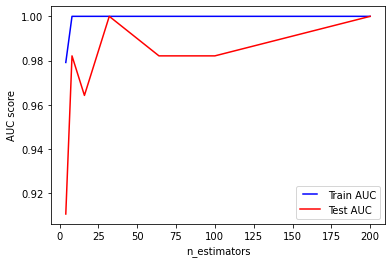

In [20]:
n_estimators = [4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   model = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()